# ISOMAP
（1） 构建临接图G（获取距离矩阵）对高纬空间中的点，两两计算距离，对每个点，只保留距离其最近的k个点，其他点认为距离无穷大\
（2） 计算所有点对之间的最短路径（重新填充距离矩阵）即对于所有点i -> j 查看是否能找到一条更短路径 i -> k -> j 进行代替\
（3） 利用重构的距离矩阵进行MDS算法， 进行降维

In [1]:
# Floyd-Warshall 算法
def floyd(D, n_neighbors = 15): 
    Max = np.max(D) * 1000 
    n1, n2 = D.shape 
    k = n_neighbors 
    D1 = np.ones((n1, n1)) * Max
    D_arg = np.argsort(D, axis = 1)
    for i in range(n1): 
        D1[i, D_arg[i, 0:k + 1]] = D[i, D_arg[i, 0:k + 1]]
    for k in range(n1): 
        for i in range(n1):
            for j in range(n1):  
                if D1[i, k] + D1[k, j] < D1[i, j]:
                    D1[i, j] = D1[i, k] + D1[k, j] 
    return D1

In [2]:
# 导包
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm 

In [3]:
def cal_pairwise_dist(x):
    N, D = np.shape(X)
    dist = np.zeros([N, N])
    for i in range(N): 
        for j in range(N): 
            dist[i][j] = np.sqrt(np.dot((x[i] - x[j]), (x[i] - x[j]).T))
    # 返回任意两个点之间的距离
    return dist 

In [4]:
# dist N*N 距离矩阵样本点两两之间的距离
# n_dims 降维
# 返回降维后的数据
def my_mds(dist, n_dims): 
    n, n = np.shape(dist) 
    dist[dist < 0] = 0 
    
    dist = dist ** 2
    
    T1 = np.ones((n, n)) * np.sum(dist) / n**2
    T2 = np.sum(dist, axis = 1, keepdims = True)/n 
    T3 = np.sum(dist, axis = 0, keepdims = True)/n 
    
    B = -(T1 - T2 - T3 + dist) / 2 
    
    eig_val, eig_vector = np.linalg.eig(B) 
    index_ = np.argsort(-eig_val)[:n_dims]
    picked_eig_val = eig_val[index_].real 
    picked_eig_vector = eig_vector[:, index_]
    return picked_eig_vector * picked_eig_val ** (0.5)

In [5]:
def my_Isomao(D, n = 2, n_neighbors = 30): 
    D_floyd = floyd(D, n_neighbors)
    data_n = my_mds(D_floyd, n_dims = n)
    return data_n 

In [6]:
def scatter_3d(X, y): 
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = y, cmap = plt.cm.hot)
    ax.view_init(10, -70)
    ax.set_xlabel("$x_1$", fontsize = 18)
    ax.set_ylabel("$x_2$", fontsize = 18)
    ax.set_zlabel("$x_3$", fontsize = 18)
    plt.show()

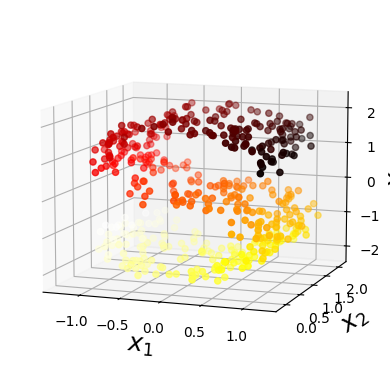

In [ ]:
# test 
from sklearn.datasets import make_s_curve 
X, Y = make_s_curve(n_samples = 500, noise = 0.1, random_state = 42)

scatter_3d(X, Y) 

# 计算距离
dist = cal_pairwise_dist(X)
# MDS 降维
data_MDS = my_Isomao(dist, 2)

plt.figure()
plt.title("my_MSD")
plt.scatter(data_MDS[:, 0], data_MDS[:, 1], c = Y)
plt.show()

# ISOMAP 降维
data_ISOMAP = my_Isomao(dist, 2, 10)
plt.figure()
plt.title("my_ISO")
plt.scatter(data_ISOMAP[:, 0], data_ISOMAP[:, 1], c = Y)
plt.show()